## Note: Some elements appear only on the Detail report (accessible from the search results by clicking on the magnifying glass icon.)

1. Term - the term in which the course was offered.
2. School/Department, Course Number and Class Number (formerly Section Number)
3. Effective Date is the date when the grade distribution data for the semester were compiled.
4. Instructor - the name of the instructor listed on the Schedule of Classes file as having taught the course. (NB: For the purposes of this report, the instructor listed as a Primary Instructor with the lowest sequence number value on the credit-bearing component is the only instructor retained. Multiple instructors have been omitted from the data set.)
5. Cls GPA (Class/Section GPA) - the average of all GPA grades awarded in the course section; GPA grades are highlighted. It is calculated by totaling the credit points for all GPA grades awarded in the section and dividing by the total number of GPA grades. In compliance with privacy regulations, section GPA is not provided if fewer than five students are enrolled in the course section, or if GPA grades were awarded and fewer than five students received GPA grades.
6. Stu GPA (Average Student GPA) - the average student GPA which is calculated by averaging the academic record GPAs of all students enrolled in the course section. The GPA level used for each student is the students current GPA level (undergraduate or graduate). Grades awarded this semester are included in the average student GPA calculation. In compliance with privacy regulations, the average student GPA is not provided if fewer than five students are enrolled in the course section, or if GPA grades were awarded and fewer than five students received GPA grades.
7. % Majors - the percentage of students in the course section whose major school (or major department for College of Arts and Sciences or Graduate School students) matches the school or department offering the course.
8. A%,B%,C%,D% - Percentage of each grade category awarded from all GPA grades (A+ through F). A% includes the grades of A+, A, and A-, and so forth.
9. Grade Distribution Not Available - Small Class Size - a note that will only appear if the number of students in the course section is fewer than five or if GPA grades were awarded and fewer than five students received GPA grades.
10. Grade Distribution - the number of students in the course section receiving each of the possible grades that can be awarded. In compliance with privacy regulations, the distribution is not provided if fewer than five students are enrolled in the course section, or if GPA grades were awarded and fewer than five students received GPA grades.
11. GPA Grd (GPA Grades) - the total number of grades issued in the course section that are considered in computing a grade point average (A, B, C, D, F). GPA grades are highlighted in the grades distribution row.
12. Tot Grd (Total Grades) - the total number of grades, both GPA grades and non-GPA grades, issued in the course section.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
wd = pd.read_csv("bus_data.csv")

In [29]:
wd.columns

Index(['TERM DESCRIPTION', 'TERM', 'SESSION', 'SESSION DESCRIPTION',
       'DEPARTMENT', 'SUBJECT', 'COURSE', 'CLASS/SECTION NBR',
       'COURSE DESCRIPTION', 'INSTRUCTOR NAME', 'GPA GRADES', 'TOTAL GRADES',
       'AVG SECT GPA', 'AVG STDNT CUM GPA', 'PERCENT MAJORS', 'A%', 'B%', 'C%',
       'D%', 'EFFECTIVE DATE'],
      dtype='object')

In [30]:
rwd = wd.dropna(how='all', axis='columns')

In [31]:
rwd

,TERM DESCRIPTION,TERM,SESSION,SESSION DESCRIPTION,DEPARTMENT,SUBJECT,COURSE,CLASS/SECTION NBR,COURSE DESCRIPTION,INSTRUCTOR NAME,GPA GRADES,TOTAL GRADES,AVG SECT GPA,AVG STDNT CUM GPA,PERCENT MAJORS,A%,B%,C%,D%,EFFECTIVE DATE
0,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1631,BASIC ACCOUNTING SKILLS,"Winston,Vivian",127,164,3.089,3.430,71.7,38.6,37.8,19.7,1.6,06/07/19
1,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1632,BASIC ACCOUNTING SKILLS,"Winston,Vivian",106,161,3.022,3.327,59.7,42.5,34.0,15.1,2.8,06/07/19
2,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1633,BASIC ACCOUNTING SKILLS,"Winston,Vivian",109,171,2.785,3.243,58.1,35.8,26.6,25.7,6.4,06/07/19
3,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1634,BASIC ACCOUNTING SKILLS,"Winston,Vivian",91,139,2.985,3.204,37.9,40.7,35.2,13.2,3.3,06/07/19
4,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1635,BASIC ACCOUNTING SKILLS,"Winston,Vivian",117,164,2.980,3.345,53.5,40.2,27.4,26.5,2.6,06/07/19
5,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1636,BASIC ACCOUNTING SKILLS,"Winston,Vivian",127,162,3.102,3.438,71.6,43.3,35.4,13.4,5.5,06/07/19
6,Spring 2019,4192,8W2,Eight Week - Second,BUS,BUS-A,100,5653,BASIC ACCOUNTING SKILLS,"Winston,Vivian",131,182,2.618,3.133,50.7,36.6,22.1,17.6,13.7,06/07/19
7,Spring 2019,4192,8W2,Eight Week - Second,BUS,BUS-A,100,5654,BASIC ACCOUNTING SKILLS,"Winston,Vivian",106,160,2.777,3.039,54.4,35.8,34.9,14.2,4.7,06/07/19
8,Spring 2019,4192,8W2,Eight Week - Second,BUS,BUS-A,100,5655,BASIC ACCOUNTING SKILLS,"Winston,Vivian",56,94,2.779,3.011,39.7,33.9,37.5,12.5,3.6,06/07/19
9,Spring 2019,4192,8W2,Eight Week - Second,BUS,BUS-A,100,5656,BASIC ACCOUNTING SKILLS,"Winston,Vivian",37,48,2.757,3.146,65.9,32.4,29.7,21.6,13.5,06/07/19


In [32]:
rwd.describe()

,COURSE,CLASS/SECTION NBR,GPA GRADES,TOTAL GRADES,AVG SECT GPA,AVG STDNT CUM GPA,PERCENT MAJORS,A%,B%,C%,D%
count,17791.000000,17791.000000,17791.000000,17791.000000,17791.000000,17791.000000,17791.000000,17791.000000,17791.000000,17791.000000,17791.000000
mean,318.086617,14035.919004,41.269856,47.372604,3.379367,3.388037,79.749446,53.873582,35.819324,7.919094,1.412102
std,138.475379,9385.611703,35.212010,39.667819,0.393415,0.203761,30.903079,26.627187,20.370647,10.124447,3.197850
min,100.000000,1152.000000,6.000000,6.000000,1.459000,2.343000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202.000000,6807.500000,24.000000,28.000000,3.075000,3.272000,69.600000,31.300000,20.500000,0.000000,0.000000
50%,304.000000,11986.000000,33.000000,39.000000,3.434000,3.397000,97.600000,50.000000,38.000000,3.000000,0.000000
75%,415.000000,19855.500000,44.000000,50.000000,3.688000,3.530000,100.000000,76.600000,51.100000,14.300000,0.000000
max,798.000000,39600.000000,274.000000,326.000000,4.000000,4.000000,100.000000,100.000000,100.000000,62.200000,31.000000


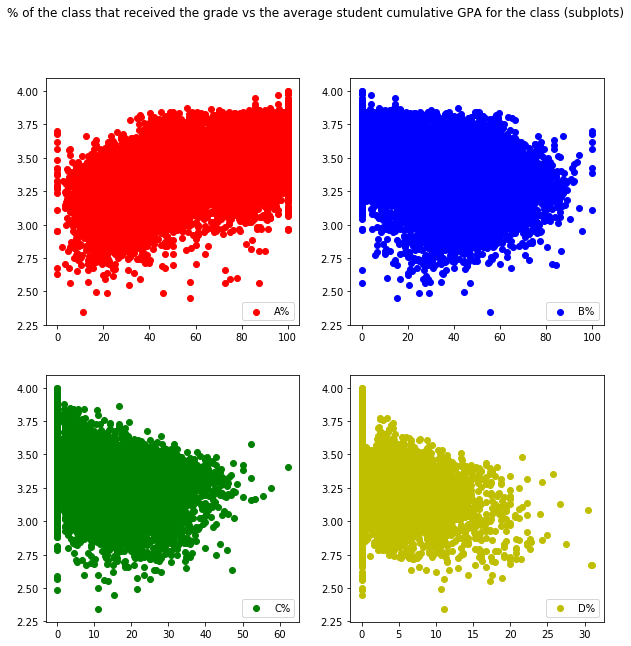

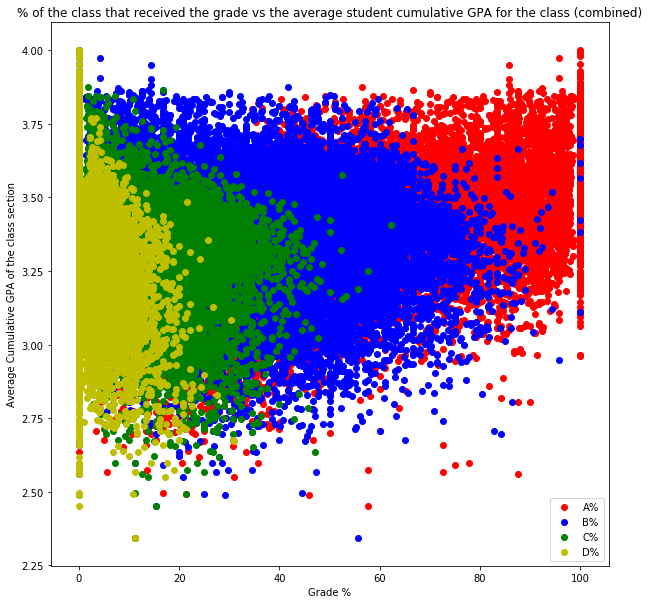

In [33]:
plt.figure(1,figsize=(10,10))
plt.xlabel("Grade %")
plt.ylabel("Average Cumulative GPA of the class section")
plt.subplot(2, 2, 1)
plt.scatter(rwd['A%'],rwd['AVG STDNT CUM GPA'], label='A%', c='r')
pylab.legend(loc='lower right')
plt.subplot(2, 2, 2)
plt.scatter(rwd['B%'],rwd['AVG STDNT CUM GPA'], label='B%', c='b')
pylab.legend(loc='lower right')
plt.subplot(2, 2, 3)
plt.scatter(rwd['C%'],rwd['AVG STDNT CUM GPA'], label='C%', c='g')
pylab.legend(loc='lower right')
plt.subplot(2, 2, 4)
plt.scatter(rwd['D%'],rwd['AVG STDNT CUM GPA'], label='D%', c='y')
pylab.legend(loc='lower right')
plt.suptitle('% of the class that received the grade vs the average student cumulative GPA for the class (subplots)')
plt.show()


plt.figure(2, figsize=(10,10))
plt.title('% of the class that received the grade vs the average student cumulative GPA for the class (combined)')
plt.xlabel("Grade %")
plt.ylabel("Average Cumulative GPA of the class section")
plt.scatter(rwd['A%'],rwd['AVG STDNT CUM GPA'], label='A%', c='r')
plt.scatter(rwd['B%'],rwd['AVG STDNT CUM GPA'], label='B%', c='b')
plt.scatter(rwd['C%'],rwd['AVG STDNT CUM GPA'], label='C%', c='g')
plt.scatter(rwd['D%'],rwd['AVG STDNT CUM GPA'], label='D%', c='y')
pylab.legend(loc='lower right')
plt.show()

In [34]:
lr = linear_model.LinearRegression()

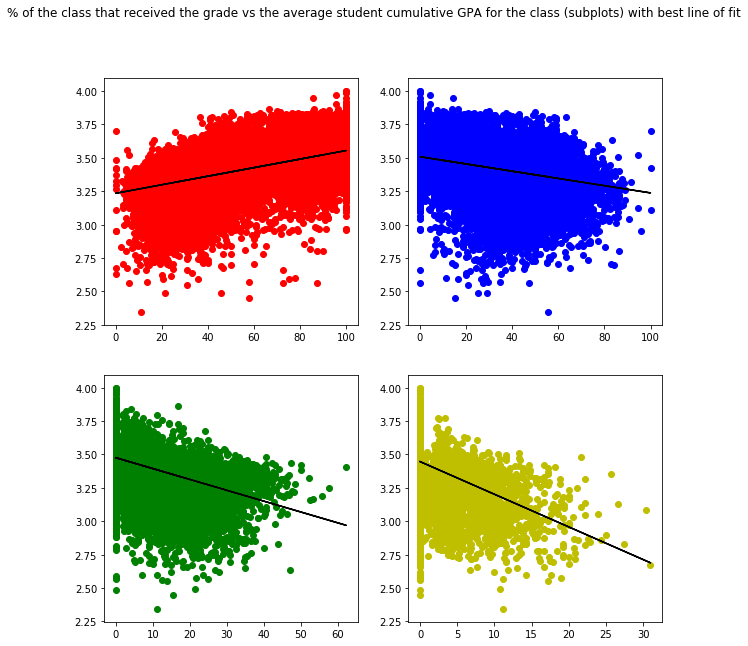

In [35]:
a = rwd[['A%', 'AVG STDNT CUM GPA']]

X1 = np.array(a['A%'])
y1 = np.array(a['AVG STDNT CUM GPA'])

X1_train = X1[:8000].reshape(-1,1)
y1_train = y1[:8000].reshape(-1,1)
X1_test = X1[8000:].reshape(-1,1)
y1_test = y1[8000:].reshape(-1,1)

lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)



b = rwd[['B%', 'AVG STDNT CUM GPA']]

X2 = np.array(b['B%'])
y2 = np.array(b['AVG STDNT CUM GPA'])

X2_train = X2[:8000].reshape(-1,1)
y2_train = y2[:8000].reshape(-1,1)
X2_test = X2[8000:].reshape(-1,1)
y2_test = y2[8000:].reshape(-1,1)

lr.fit(X2_train,y2_train)
y2_pred = lr.predict(X2_test)



c = rwd[['C%', 'AVG STDNT CUM GPA']]

X3 = np.array(c['C%'])
y3 = np.array(c['AVG STDNT CUM GPA'])

X3_train = X3[:8000].reshape(-1,1)
y3_train = y3[:8000].reshape(-1,1)
X3_test = X3[8000:].reshape(-1,1)
y3_test = y3[8000:].reshape(-1,1)

lr.fit(X3_train,y3_train)
y3_pred = lr.predict(X3_test)


d = rwd[['D%', 'AVG STDNT CUM GPA']]

X4 = np.array(d['D%'])
y4 = np.array(d['AVG STDNT CUM GPA'])

X4_train = X4[:8000].reshape(-1,1)
y4_train = y4[:8000].reshape(-1,1)
X4_test = X4[8000:].reshape(-1,1)
y4_test = y4[8000:].reshape(-1,1)

lr.fit(X4_train,y4_train)
y4_pred = lr.predict(X4_test)


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X1_test, y1_test, c='r')
plt.plot(X1_test, y1_pred, color='black')

plt.subplot(2,2,2)
plt.scatter(X2_test, y2_test, c='b')
plt.plot(X2_test, y2_pred, color='black')

plt.subplot(2,2,3)
plt.scatter(X3_test, y3_test, c='g')
plt.plot(X3_test, y3_pred, color='black')

plt.subplot(2,2,4)
plt.scatter(X4_test, y4_test, c='y')
plt.plot(X4_test, y4_pred, color='black')

plt.suptitle('% of the class that received the grade vs the average student cumulative GPA for the class (subplots) with best line of fit')
plt.show()
plt.show()

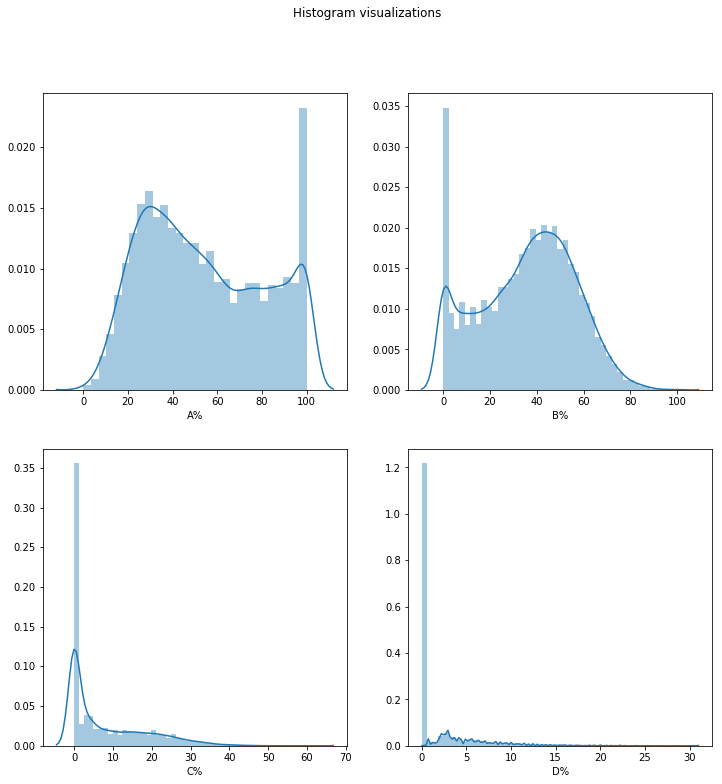

In [36]:
plt.figure(1,figsize=(12,12))
plt.subplot(2, 2, 1)
sns.distplot(rwd['A%'])
plt.subplot(2, 2, 2)
sns.distplot(rwd['B%'])
plt.subplot(2, 2, 3)
sns.distplot(rwd['C%'])
plt.subplot(2, 2, 4)
sns.distplot(rwd['D%'])

plt.suptitle('Histogram visualizations')
plt.show()

In [37]:
rwd.groupby('DEPARTMENT').head()

,TERM DESCRIPTION,TERM,SESSION,SESSION DESCRIPTION,DEPARTMENT,SUBJECT,COURSE,CLASS/SECTION NBR,COURSE DESCRIPTION,INSTRUCTOR NAME,GPA GRADES,TOTAL GRADES,AVG SECT GPA,AVG STDNT CUM GPA,PERCENT MAJORS,A%,B%,C%,D%,EFFECTIVE DATE
0,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1631,BASIC ACCOUNTING SKILLS,"Winston,Vivian",127,164,3.089,3.430,71.7,38.6,37.8,19.7,1.6,06/07/19
1,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1632,BASIC ACCOUNTING SKILLS,"Winston,Vivian",106,161,3.022,3.327,59.7,42.5,34.0,15.1,2.8,06/07/19
2,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1633,BASIC ACCOUNTING SKILLS,"Winston,Vivian",109,171,2.785,3.243,58.1,35.8,26.6,25.7,6.4,06/07/19
3,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1634,BASIC ACCOUNTING SKILLS,"Winston,Vivian",91,139,2.985,3.204,37.9,40.7,35.2,13.2,3.3,06/07/19
4,Spring 2019,4192,8W1,Eight Week - First,BUS,BUS-A,100,1635,BASIC ACCOUNTING SKILLS,"Winston,Vivian",117,164,2.980,3.345,53.5,40.2,27.4,26.5,2.6,06/07/19


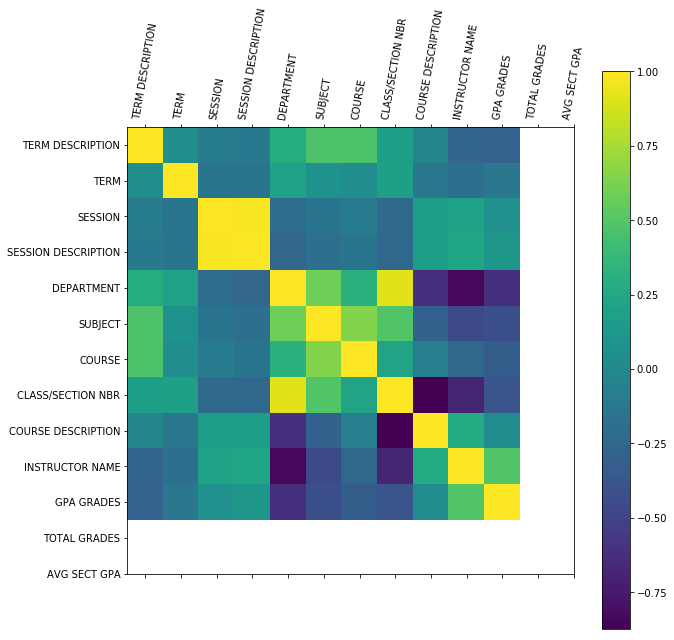

In [38]:
f = plt.figure(figsize=(10, 10))
plt.matshow(rwd.corr(), fignum=f.number)
plt.xticks(range(rwd.shape[1]-7), rwd.columns, fontsize=10, rotation=80)
plt.yticks(range(rwd.shape[1]-7), rwd.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [52]:
corr = rwd.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

D%                 D%                   1.000000
C%                 C%                   1.000000
CLASS/SECTION NBR  CLASS/SECTION NBR    1.000000
GPA GRADES         GPA GRADES           1.000000
TOTAL GRADES       TOTAL GRADES         1.000000
AVG SECT GPA       AVG SECT GPA         1.000000
PERCENT MAJORS     PERCENT MAJORS       1.000000
A%                 A%                   1.000000
B%                 B%                   1.000000
AVG STDNT CUM GPA  AVG STDNT CUM GPA    1.000000
COURSE             COURSE               1.000000
TOTAL GRADES       GPA GRADES           0.979248
GPA GRADES         TOTAL GRADES         0.979248
A%                 AVG SECT GPA         0.913724
AVG SECT GPA       A%                   0.913724
B%                 A%                   0.874415
A%                 B%                   0.874415
C%                 AVG SECT GPA         0.834043
AVG SECT GPA       C%                   0.834043
C%                 A%                   0.684008
A%                 C

In [39]:
count1, count2, count3, count4 = 0, 0, 0, 0
for i in rwd['A%']:
    if i==100.0:
        count1+=1

for i in rwd['B%']:
    if i==100.0:
        count2+=1

for i in rwd['C%']:
    if i>60.0:
        count3+=1

for i in rwd['D%']:
    if i>30.0:
        count4+=1
        
print("# classes in which all students got As:", count1)
print("# classes in which all students got Bs:", count2)
print("# classes in which more than 60% students got Cs:", count3)
print("# classes in which more than 30% students got Ds:", count4)

# classes in which all students got As: 1251
# classes in which all students got Bs: 7
# classes in which more than 60% students got Cs: 1
# classes in which more than 30% students got Ds: 3


In [48]:
inst_name = rwd.iloc[:,9].values

In [49]:
np.unique(list(inst_name))

array(['.,Benjamin', 'Abbott,Megan Renee', 'Abramson,Joel',
       'Acito,Franklin', 'Agger,Charlotte Alice', 'Aguinis,Herman',
       'Ahoni,Jessica M', 'Ahuja,Vikram', 'Akaiwa,Frank Ernest',
       'Akinribade,Omoyemi Florence', 'Albright,S. Christian',
       'Alexander,Brett Witbrodt', 'Amadio,Cassandra', 'Anderson,Brian S',
       'Anderson,James B', 'Anderson,Katherine Marie',
       'Anderson,Matthew D', 'Anderson,Spencer Blake', 'Andrews,Jonlee',
       'Aneiros,Angela Nicole', 'Arcot,Sridhar', 'Arif,Salman',
       'Armendariz Buaun,Ramses Yusseff', 'Arvesen,Jerry',
       'Asbury,Laura Ann', 'Ash,Richard', 'Astill,Andrea',
       'Astvansh,Vivek', 'Aud Jr,Ernest Francis', 'Aydin,Goker',
       'Baden,Fallon Alyse', 'Bailey-Hughes,Brenda Marie', 'Baird,Joseph',
       'Baird,Joseph Neal', 'Bakker,Rene', 'Bala,Hillol',
       'Baldwin,Timothy T.', 'Ball,George Patrick', 'Banks,Karen Y.s.',
       'Bannon,Amanda Lynn', 'Barlow,Jordan Brett',
       'Barnett,Andrew James', 'Barsi

In [50]:
subj_name = rwd.iloc[:,5].values
np.unique(list(subj_name))

array(['BUS-A', 'BUS-A ', 'BUS-C', 'BUS-C ', 'BUS-D', 'BUS-D ', 'BUS-F',
       'BUS-F ', 'BUS-G', 'BUS-G ', 'BUS-I', 'BUS-I ', 'BUS-J', 'BUS-J ',
       'BUS-K', 'BUS-K ', 'BUS-L', 'BUS-L ', 'BUS-M', 'BUS-M ', 'BUS-P',
       'BUS-P ', 'BUS-R', 'BUS-R ', 'BUS-S', 'BUS-S ', 'BUS-T', 'BUS-T ',
       'BUS-W', 'BUS-W ', 'BUS-X', 'BUS-X ', 'BUS-Z', 'BUS-Z '],
      dtype='<U6')